In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df=pd.read_csv("Steel_industry_data.csv") 

In [3]:
df

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31-12-2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31-12-2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31-12-2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31-12-2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# Missing Values

In [4]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [5]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


# Relation Between Columns

In [6]:
import matplotlib.pyplot as plt 

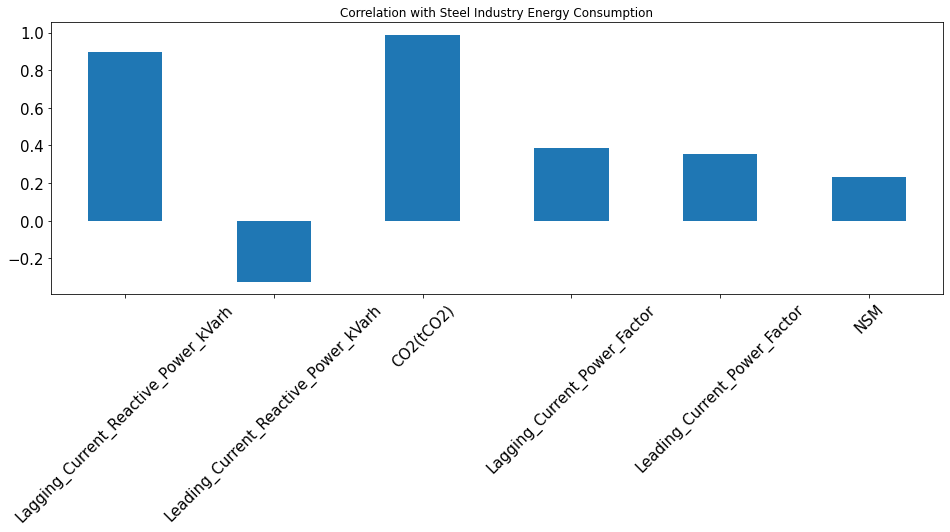

In [7]:
df1= df.copy()
X = df1.drop(['Usage_kWh'],axis=1)
y = df1['Usage_kWh']

X.corrwith(y).plot.bar(
        figsize = (16, 5), title = "Correlation with Steel Industry Energy Consumption", fontsize = 15,
        rot = 45, grid = False)
plt.show()

In [8]:
import seaborn as sns

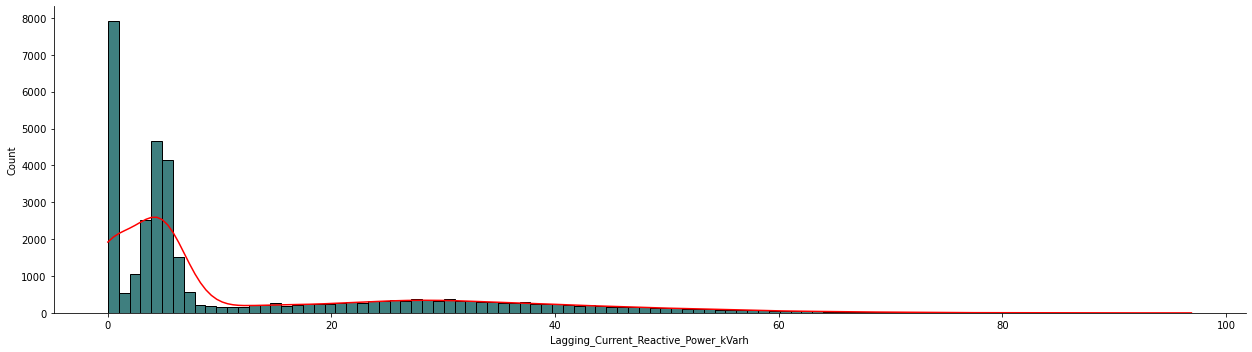

In [9]:
sns.displot(data=df, x="Lagging_Current_Reactive_Power_kVarh", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

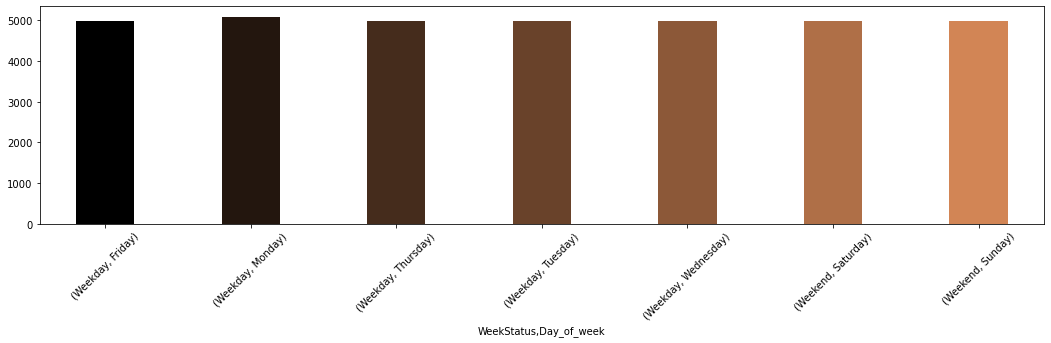

In [10]:
plt.figure(figsize=(18,4))
color = plt.cm.copper(np.linspace(0, 1, 10))
df.groupby(['WeekStatus','Day_of_week'])['Usage_kWh'].count().plot(kind='bar', width=.4,color=color);
plt.xticks(rotation=45);

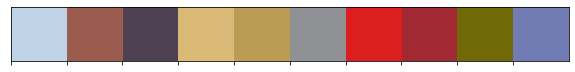

In [11]:
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]
sns.palplot(sns.color_palette(colors))

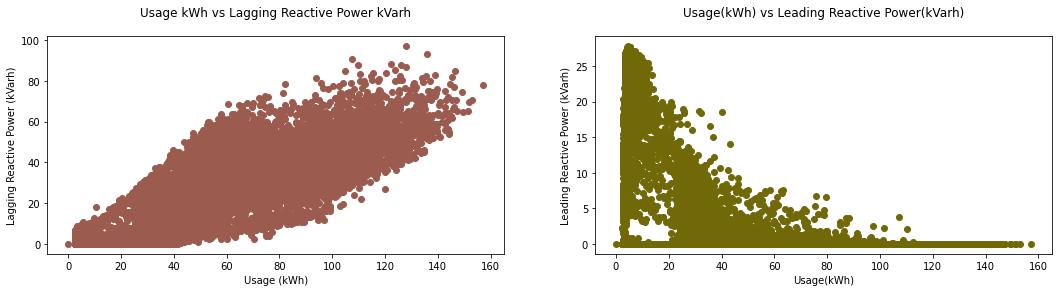

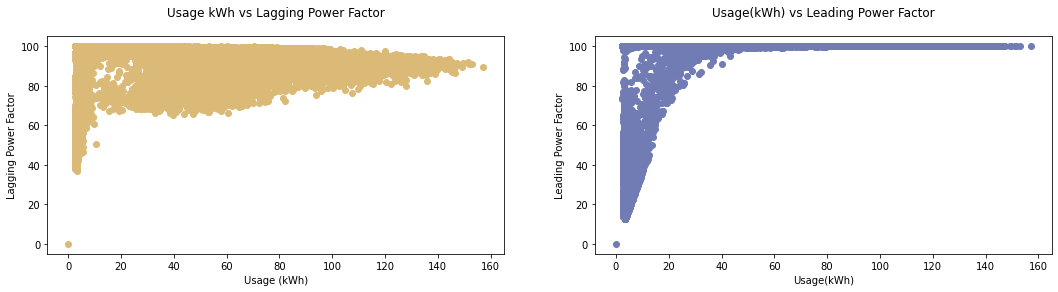

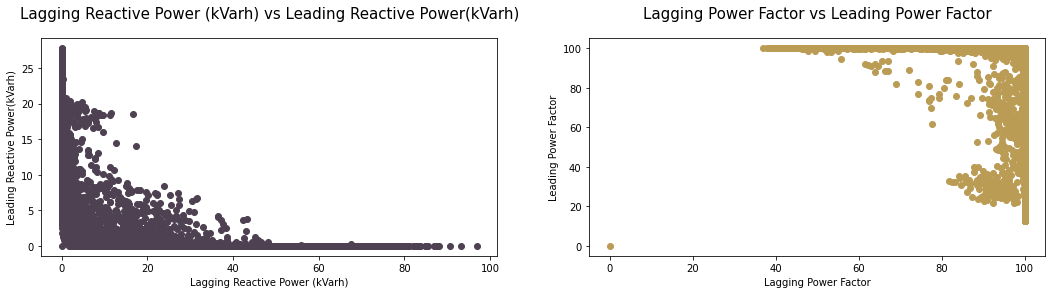

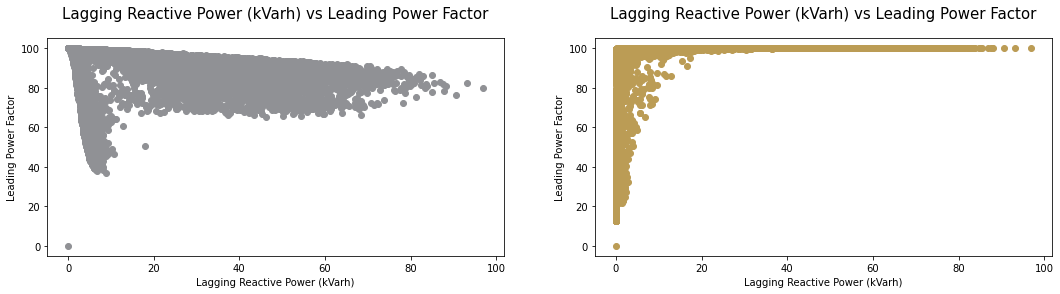

In [12]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(18,4))
fig, (ax3,ax4) =plt.subplots(1,2, figsize=(18,4))
fig, (ax5,ax6) =plt.subplots(1,2, figsize=(18,4))
fig, (ax7,ax8) =plt.subplots(1,2, figsize=(18,4))

ax1.scatter(data=df,x="Usage_kWh", y="Lagging_Current_Reactive_Power_kVarh", color=colors[1])
ax1.set_title("Usage kWh vs Lagging Reactive Power kVarh",pad=20)
ax1.set_xlabel("Usage (kWh)")
ax1.set_ylabel("Lagging Reactive Power (kVarh)")

ax2.scatter(data=df,x="Usage_kWh",y="Leading_Current_Reactive_Power_kVarh", color=colors[8])
ax2.set_title("Usage(kWh) vs Leading Reactive Power(kVarh)",pad=20)
ax2.set_xlabel("Usage(kWh)")
ax2.set_ylabel("Leading Reactive Power (kVarh)")

ax3.scatter(data=df,x="Usage_kWh", y="Lagging_Current_Power_Factor", color=colors[3])
ax3.set_title("Usage kWh vs Lagging Power Factor",pad=20)
ax3.set_xlabel("Usage (kWh)")
ax3.set_ylabel("Lagging Power Factor")

ax4.scatter(data=df,x="Usage_kWh",y="Leading_Current_Power_Factor", color=colors[9]) 
ax4.set_title("Usage(kWh) vs Leading Power Factor",pad=20)
ax4.set_xlabel("Usage(kWh)")
ax4.set_ylabel("Leading Power Factor")

ax5.scatter(data=df,x="Lagging_Current_Reactive_Power_kVarh",y="Leading_Current_Reactive_Power_kVarh", color=colors[2]) 
ax5.set_title("Lagging Reactive Power (kVarh) vs Leading Reactive Power(kVarh)",pad=20,fontsize=15)
ax5.set_xlabel("Lagging Reactive Power (kVarh)")
ax5.set_ylabel("Leading Reactive Power(kVarh)")

ax6.scatter(data=df,x="Lagging_Current_Power_Factor",y="Leading_Current_Power_Factor", color=colors[4]) 
ax6.set_title("Lagging Power Factor vs Leading Power Factor",pad=20,fontsize=15)
ax6.set_xlabel("Lagging Power Factor")
ax6.set_ylabel("Leading Power Factor")

ax7.scatter(data=df,x="Lagging_Current_Reactive_Power_kVarh",y="Lagging_Current_Power_Factor", color=colors[5]) 
ax7.set_title("Lagging Reactive Power (kVarh) vs Leading Power Factor",pad=20,fontsize=15)
ax7.set_xlabel("Lagging Reactive Power (kVarh)")
ax7.set_ylabel("Leading Power Factor")

ax8.scatter(data=df,x="Lagging_Current_Reactive_Power_kVarh",y="Leading_Current_Power_Factor", color=colors[4]) 
ax8.set_title("Lagging Reactive Power (kVarh) vs Leading Power Factor",pad=20,fontsize=15)
ax8.set_xlabel("Lagging Reactive Power (kVarh)")
ax8.set_ylabel("Leading Power Factor")

plt.show()

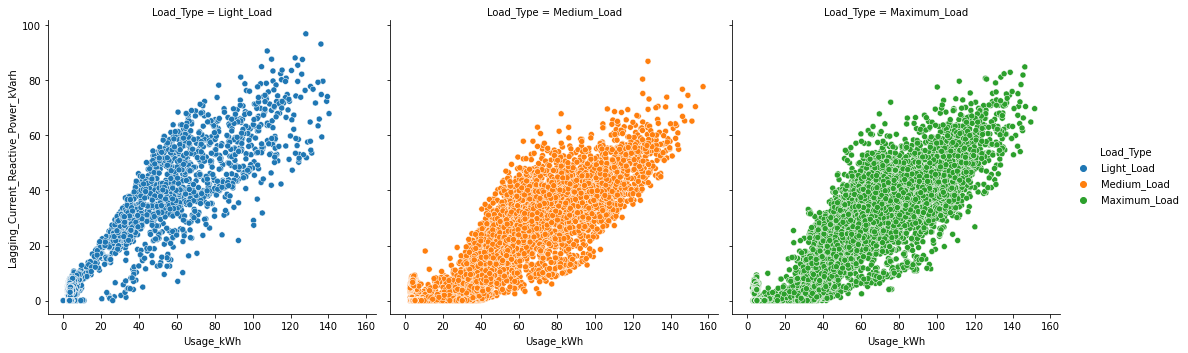

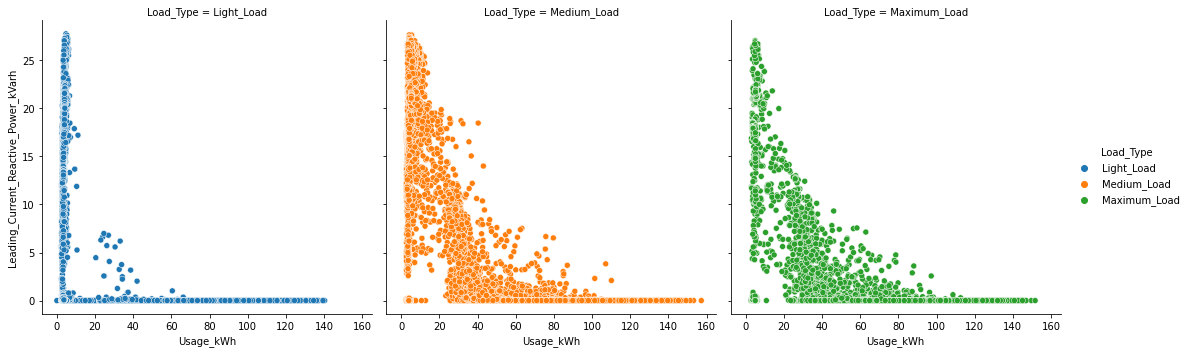

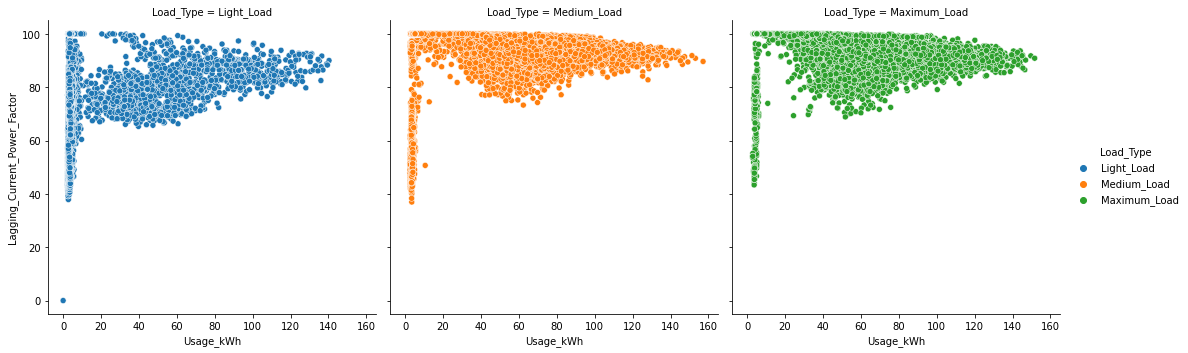

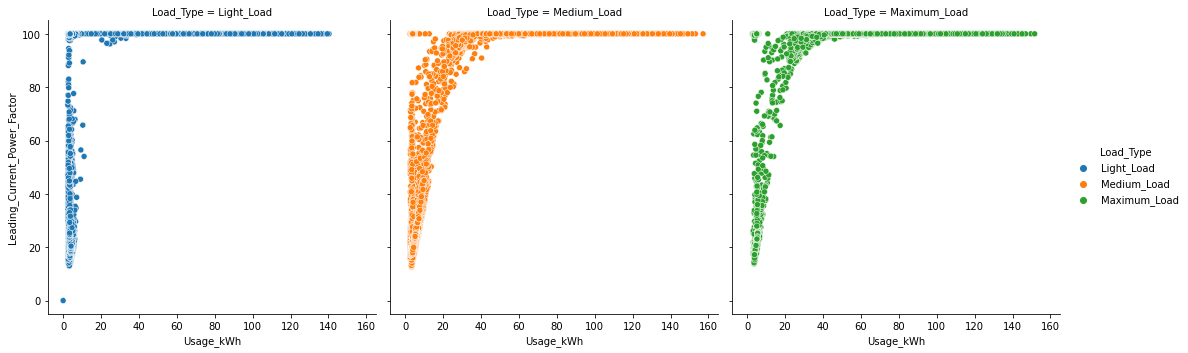

In [13]:
sns.relplot(data=df, x="Usage_kWh", y="Lagging_Current_Reactive_Power_kVarh", hue="Load_Type",col="Load_Type",palette='tab10');
sns.relplot(data=df, x="Usage_kWh", y="Leading_Current_Reactive_Power_kVarh", hue="Load_Type",col="Load_Type",palette='tab10');
sns.relplot(data=df, x="Usage_kWh", y="Lagging_Current_Power_Factor", hue="Load_Type",col="Load_Type",palette='tab10');
sns.relplot(data=df, x="Usage_kWh", y="Leading_Current_Power_Factor", hue="Load_Type",col="Load_Type",palette='tab10');

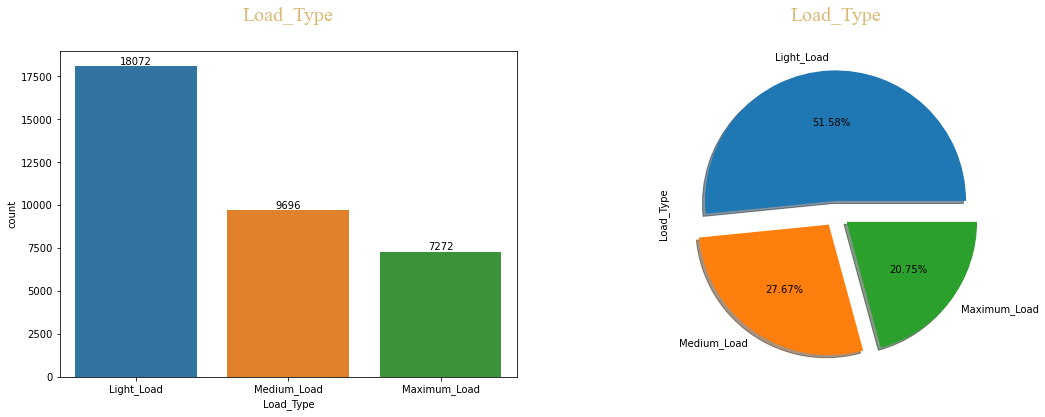

In [14]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Load_Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Load_Type", fontsize=20,color='#dbba78',font='Times New Roman',pad=30)
ax =plt.subplot(1,2,2)
ax=df['Load_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Load_Type", fontsize = 20,color='#dbba78',font='Times New Roman',pad=30);

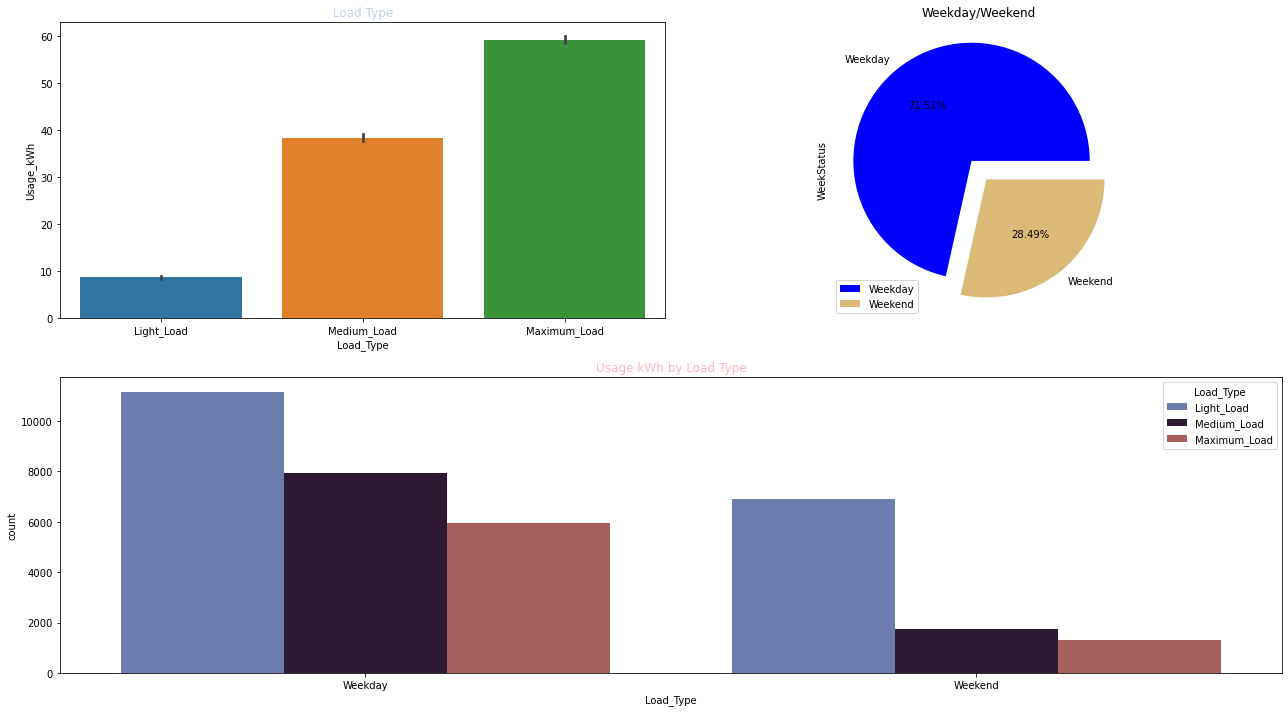

In [15]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.barplot(x = 'Load_Type', y = 'Usage_kWh', palette= "tab10",data=df)
plt.title("Load Type", color = "#bfd3e6")
plt.xlabel("Load_Type")
plt.ylabel("Usage_kWh")

plt.subplot(2,2,2)
df["WeekStatus"].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1, 0.1], colors=['blue','#dbba78'])
p = plt.gcf()
plt.title("Weekday/Weekend")
plt.legend()
plt.subplot(2,2,(3,4))

sns.countplot(x = 'WeekStatus', hue = 'Load_Type', data = df, palette="twilight")
plt.title("Usage kWh by Load Type", color = "Lightpink")
plt.xlabel("Load_Type")
plt.tight_layout()
plt.show()

# LabelEncoding

In [16]:
from sklearn.preprocessing import LabelEncoder
selectcolumn = df.select_dtypes(include = "object").columns
le = LabelEncoder()
df[selectcolumn] = df[selectcolumn].apply(le.fit_transform)
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,2,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,3,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,4,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,5,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


# train_test_split

In [17]:
from sklearn.model_selection import train_test_split
data = df.drop(['Load_Type'], axis=1)
target = df.Load_Type

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25) 

# Preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

In [19]:
pipe1 = Pipeline([('sc', StandardScaler()), ('pca', PCA()), ('lr', LogisticRegression())])
pipe2 = Pipeline([('sc', StandardScaler()), ('pca', PCA()), ("knn", KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))])
pipe3 = Pipeline([('sc', StandardScaler()), ('pca', PCA()),  ("perceptron", Perceptron(penalty="l2"))])
pipe1.fit(x_train, y_train)
pipe2.fit(x_train,y_train)
pipe3.fit(x_train,y_train)

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                ('perceptron', Perceptron(penalty='l2'))])

In [20]:
print("Trainimg Accuracy with LogisticRegression", pipe1.score(x_train, y_train))
print("Testing Accuracy with LogisticRegression", pipe1.score(x_test,y_test))
print("\n")
print("Trainimg Accuracy with KNeighborsClassifier", pipe2.score(x_train, y_train))
print("Testing Accuracy with KNeighborsClassifier", pipe2.score(x_test,y_test))
print("\n")
print("Trainimg Accuracy with Perceptron", pipe3.score(x_train, y_train))
print("Testing Accuracy with Perceptron", pipe3.score(x_test,y_test))

Trainimg Accuracy with LogisticRegression 0.7579528158295281
Testing Accuracy with LogisticRegression 0.757648401826484


Trainimg Accuracy with KNeighborsClassifier 0.904490106544901
Testing Accuracy with KNeighborsClassifier 0.8389269406392694


Trainimg Accuracy with Perceptron 0.6976407914764079
Testing Accuracy with Perceptron 0.7009132420091324


# HyperParameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
lr_params = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
knn_params = {'n_neighbors':range(1,30,2),'weights':['uniform','distance'],'metric':['euclidean','manhattan','minkowski'],'leaf_size':range(1,50,5)}

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
# cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3, random_state=25)

In [24]:
gs1 = GridSearchCV(LogisticRegression(), param_grid=lr_params, scoring='accuracy', cv=2, error_score=0)
gs2 = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, scoring='accuracy', cv=2, error_score=0)

In [25]:
gs1.fit(data, target)
gs2.fit(data, target)

GridSearchCV(cv=2, error_score=0, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': range(1, 50, 5),
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 30, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [28]:
print("Logistic Regression Best Score:", gs1.best_score_)
print("KNeighborsClassifier Best Score:", gs2.best_score_)

Logistic Regression Best Score: 0.6710331050228311
KNeighborsClassifier Best Score: 0.8480022831050228


In [29]:
print("Logistic Regression Best parameter:", gs1.best_params_)
print("SVM Best parameter:",gs2.best_params_)

Logistic Regression Best parameter: {'C': 0.1, 'penalty': 'l2'}
SVM Best parameter: {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
